# EDA: Bank Loan Default Risk Analysis For Machine Learning

Course: Exploratory Data Analysis for Machine Learning by IBM/Coursera <br>
Author: [Kanishk Kumar](https://www.linkedin.com/in/kanishkkumar11/)
<hr>

### Table of contents
* [Introduction: Data Selection and Collection](#introduction)
* [Data Wrangling and Feature Engineering](#data)
* [Data Analysis](#analysis)
* [Hypothesis Statement and Testing](#hypo)
  * [Hypothesis I](#hypo1)
  * [Hypothesis II](#hypo2)
  * [Hypothesis III](#hypo3)
* [Conclusion](#conclusion)

### Introduction <a name="introduction"></a>
<hr>

Dataset used in this project has been retrieved from Kaggle and can be found [here.](https://www.kaggle.com/gauravduttakiit/loan-defaulter)

Since there is not much information about how this data was gathered, for the sake of this project, I will assume good statiscal methods were employed during the collection of the data.

The purpose of this dataset is to train machine learning models to assess risk. This is beyond the scope of this project and therefore there are too many fields that are not needed. They will be dropped for a cleaner dataset.

##### Importing necessary libraries.

In [1]:
#Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Scientific
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy.stats.mstats import winsorize
from scipy import stats

#Others
import pprint

#Magic Functions
%matplotlib inline

##### Reading the data from CSV into a Dataframe.

In [2]:
application_data = pd.read_csv('data/application_data.csv', header = 0)

In [3]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

### Data Wrangling and Feature Engineering <a name="data"></a>
<hr>

Only a subset of the data will be considered for this project. Namely:

- SK_ID_CURR: ID of loan in our sample.

- TARGET: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

- NAME_CONTRACT_TYPE: Identification if loan is cash or revolving.

- CODE_GENDER: Gender of the client.

- FLAG_OWN_CAR: Flag if the client owns a car.

- FLAG_OWN_REALTY: Flag if the client owns property.

- CNT_CHILDREN: Number of children the client has.

- AMT_INCOME_TOTAL: Income of the client.

- AMT_CREDIT: Credit amount of the loan.

- AMT_ANNUITY: Loan annuity.

- DAYS_BIRTH: Client's age in days at the time of application.

In [4]:
data_subset = application_data.loc[:, ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 
                                       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL',
                                       'AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH']]
data_subset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,-9461
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,-16765
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,-19046
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,-19005
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,-19932
...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,-9327
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,-20775
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,-14966
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,-11961


In [5]:
print('There are ' + str(len(data_subset)) + ' rows in the DataFrame.')
display(data_subset.dtypes)

There are 307511 rows in the DataFrame.


SK_ID_CURR              int64
TARGET                  int64
NAME_CONTRACT_TYPE     object
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN            int64
AMT_INCOME_TOTAL      float64
AMT_CREDIT            float64
AMT_ANNUITY           float64
DAYS_BIRTH              int64
dtype: object

In [6]:
print(data_subset.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   DAYS_BIRTH  
0       -9461  
1      -16765  
2      -19046  
3      -19005  
4      -19932  


Now that a subset of the data has been obtained, some cleaning needs to be done. For instance:
- Check for null values and unique values.
- Create a field called age and calculate AGE from DAYS_BIRTH field.
- Encode the categorical data like Gender, etc...

In [7]:
rows, col = data_subset.shape
print('There are ' + str(rows) + ' rows and ' + str(col) + ' columns in data_subset.')

There are 307511 rows and 11 columns in data_subset.


Checking for number of unique values in each column.

In [8]:
data_subset.nunique(axis=0)

SK_ID_CURR            307511
TARGET                     2
NAME_CONTRACT_TYPE         2
CODE_GENDER                3
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN              15
AMT_INCOME_TOTAL        2548
AMT_CREDIT              5603
AMT_ANNUITY            13672
DAYS_BIRTH             17460
dtype: int64

There appears to be 3 values in the Gender column. We investigate why further down.

Checking for null values.

In [9]:
data_subset.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY           12
DAYS_BIRTH             0
dtype: int64

There are 12 records with no value in the AMT_ANNUITY field. Let's see them.

In [10]:
data_subset[data_subset['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,-10668
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,-9027
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,-17376
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,-11329
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,-19762
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,-20831
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,-12134
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,-13902
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,-10151
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,-16344


We won't drop the records with no values in AMT_ANNUITY. We will instead convert the null values to -1.

In [11]:
data_subset = data_subset.fillna(-1)
data_subset.isnull().sum() # cross-check

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
CNT_CHILDREN          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
DAYS_BIRTH            0
dtype: int64

We'll create a field called AGE and calculate age based on field called DAYS_BIRTH.

In [12]:
data_subset['AGE'] = data_subset['DAYS_BIRTH'] * -1 / 365
data_subset = data_subset.round(1)
data_subset[['DAYS_BIRTH', 'AGE']]

,DAYS_BIRTH,AGE
0,-9461,25.9
1,-16765,45.9
2,-19046,52.2
3,-19005,52.1
4,-19932,54.6
...,...,...
307506,-9327,25.6
307507,-20775,56.9
307508,-14966,41.0
307509,-11961,32.8


One Hot Encoding Categorical fields.

In [13]:
enc = OneHotEncoder(sparse = False)
encoded_features = enc.fit_transform(data_subset[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']])

encoded_featuresNames = enc.get_feature_names(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'])

encoded_df = pd.DataFrame(data = encoded_features, columns = encoded_featuresNames)
encoded_df

,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
307506,0.0,1.0,0.0,1.0,0.0,1.0,0.0
307507,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307508,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307509,1.0,0.0,0.0,1.0,0.0,0.0,1.0


While encoding Gender, it is revealed that there are missing values in the field that was not detected since they were written as the string 'XNA'. We need to find out how many are there and we have to decide whether to keep them in a separate column like the encoder did, or remove them.

In [14]:
data_subset['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

There are 4 records with missing values for Gender. Since we have not decided on what model this data will be used, we cannot assess the impact that the missing gender values will have. It is also possible that those are not a mistake and that the persons did not want to disclose their gender or did not identify with the Gender Binary System. Therefore, we will keep those 4 records as they could prove useful for our model.

Merging the encoded columns to the dataframe and dropping the old ones.

In [15]:
data_subset = data_subset.join(encoded_df)

In [16]:
cleaned_data = data_subset.drop(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], 1)
cleaned_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,AGE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,100002,1,Cash loans,0,202500.0,406597.5,24700.5,-9461,25.9,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,100003,0,Cash loans,0,270000.0,1293502.5,35698.5,-16765,45.9,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,100004,0,Revolving loans,0,67500.0,135000.0,6750.0,-19046,52.2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,100006,0,Cash loans,0,135000.0,312682.5,29686.5,-19005,52.1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,100007,0,Cash loans,0,121500.0,513000.0,21865.5,-19932,54.6,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,0,157500.0,254700.0,27558.0,-9327,25.6,0.0,1.0,0.0,1.0,0.0,1.0,0.0
307507,456252,0,Cash loans,0,72000.0,269550.0,12001.5,-20775,56.9,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307508,456253,0,Cash loans,0,153000.0,677664.0,29979.0,-14966,41.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307509,456254,1,Cash loans,0,171000.0,370107.0,20205.0,-11961,32.8,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### Data Analysis <a name="analysis"></a>
<hr>

Plotting a correlogram for preliminary analysis on the continuous variables.

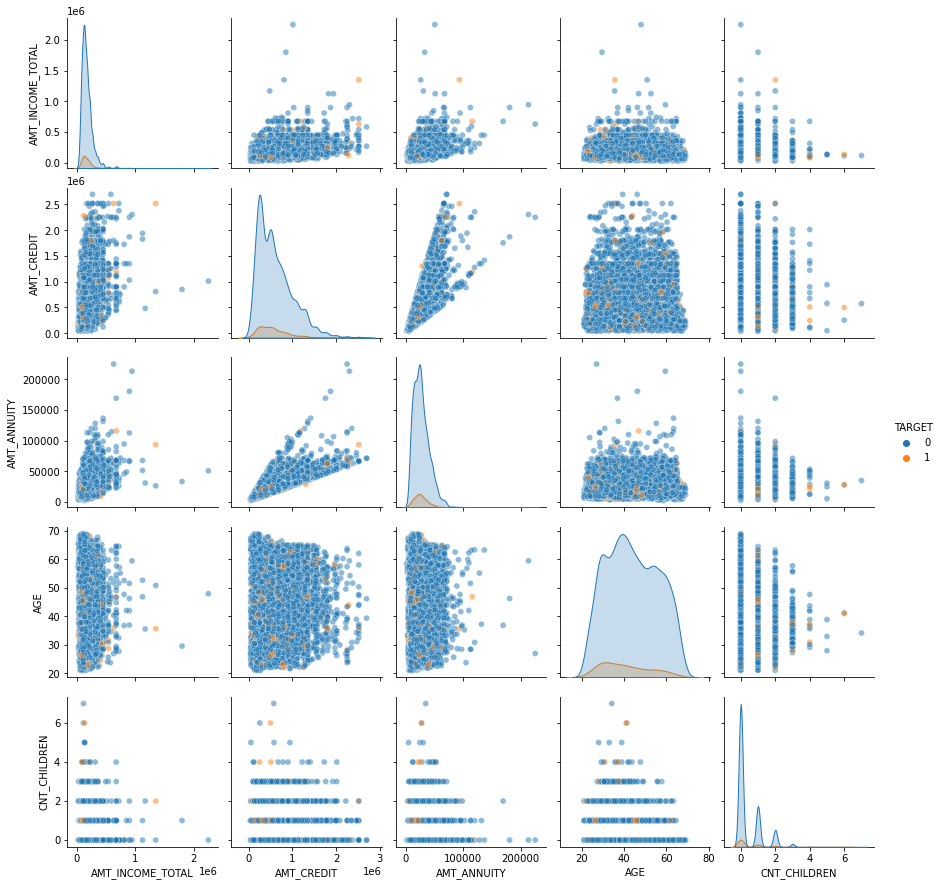

In [17]:
sns.pairplot(cleaned_data[['AMT_INCOME_TOTAL',
                           'AMT_CREDIT',
                           'AMT_ANNUITY',
                           'AGE', 
                           'CNT_CHILDREN',
                           'TARGET']].sample(10000),
             hue='TARGET',
             plot_kws=dict(alpha=0.5))

From the graphs, we can see that there is 1 extreme outlier point in the AMT_INCOME_TOTAL column. Let's investigate that column and the CNT_CHILDREN column.

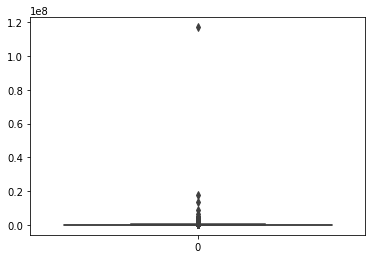

In [18]:
sns.boxplot(data=cleaned_data['AMT_INCOME_TOTAL'])

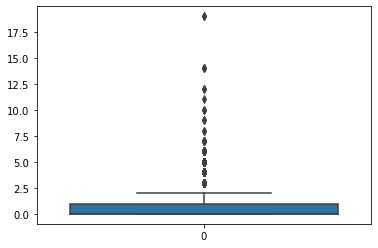

In [19]:
sns.boxplot(data=cleaned_data['CNT_CHILDREN'])

**Observations:**<br>
1. From the boxplot above, we can see that there is 1 extreme outlier in the AMT_INCOME_TOTAL column and a few other outliers that are really affecting our view and would probably cause a lot of harm to any model we decide to use in the future. Since this data is about currency, it is likely that extra zeros have been added by mistake and thus causing those outliers to exist. We shall use the method called Winsorization to deal with them. A definition of the method is:<br> *Winsorization* is the method to reduce the influence of outliers by changing them to be close to other data points. Scipy has a handy method to handle this.<br><br>

2. Outliers exist in the CNT_CHILDREN column. The data suggests that people in their 20s have over 10 children and in some extreme cases, over 15 children. That is not really possible and are most likely errors during data entry. We shall eliminate the records that are more than 3 standard deviations from the mean.

We will winsorize only the top 5% of the data and see if it has any effects on the distribution.

In [20]:
cleaned_data['AMT_INCOME_TOTAL'] = winsorize(cleaned_data['AMT_INCOME_TOTAL'], limits=[None, 0.05])

Winsorization clearly worked and now we have a more complete view of the data.

Removing Count of Children that are 3 standard deviations away from the mean.

In [21]:
z_scores = stats.zscore(cleaned_data['CNT_CHILDREN'])
z_scores

array([-0.57753784, -0.57753784, -0.57753784, ..., -0.57753784,
       -0.57753784, -0.57753784])

In [22]:
abs_z_scores = np.abs(z_scores)
abs_z_scores

array([0.57753784, 0.57753784, 0.57753784, ..., 0.57753784, 0.57753784,
       0.57753784])

In [23]:
filtered_entries = (abs_z_scores < 3)
filtered_entries

array([ True,  True,  True, ...,  True,  True,  True])

There are 307511 records before removing outliers.
There are 303239 records after removing outliers.
4272 records have been removed.


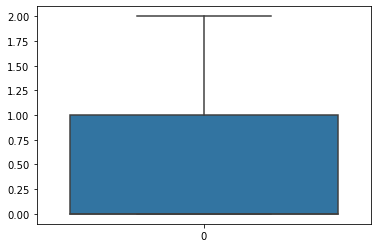

In [24]:
print('There are ' + str(len(cleaned_data.index)) + ' records before removing outliers.')
print('There are ' + str(len(cleaned_data[filtered_entries].index)) + ' records after removing outliers.')
print(str(len(cleaned_data.index) - len(cleaned_data[filtered_entries].index)) + ' records have been removed.')
sns.boxplot(data=cleaned_data[filtered_entries]['CNT_CHILDREN'])

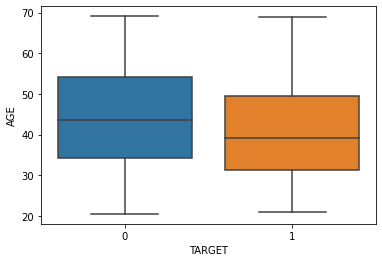

In [25]:
sns.boxplot(data = cleaned_data[['TARGET', 'AGE']], y = 'AGE', x = 'TARGET')

4272 records represent 1.3% of the total records and the data becomes a lot more consistent.

In [26]:
cleaned_data = cleaned_data[filtered_entries]

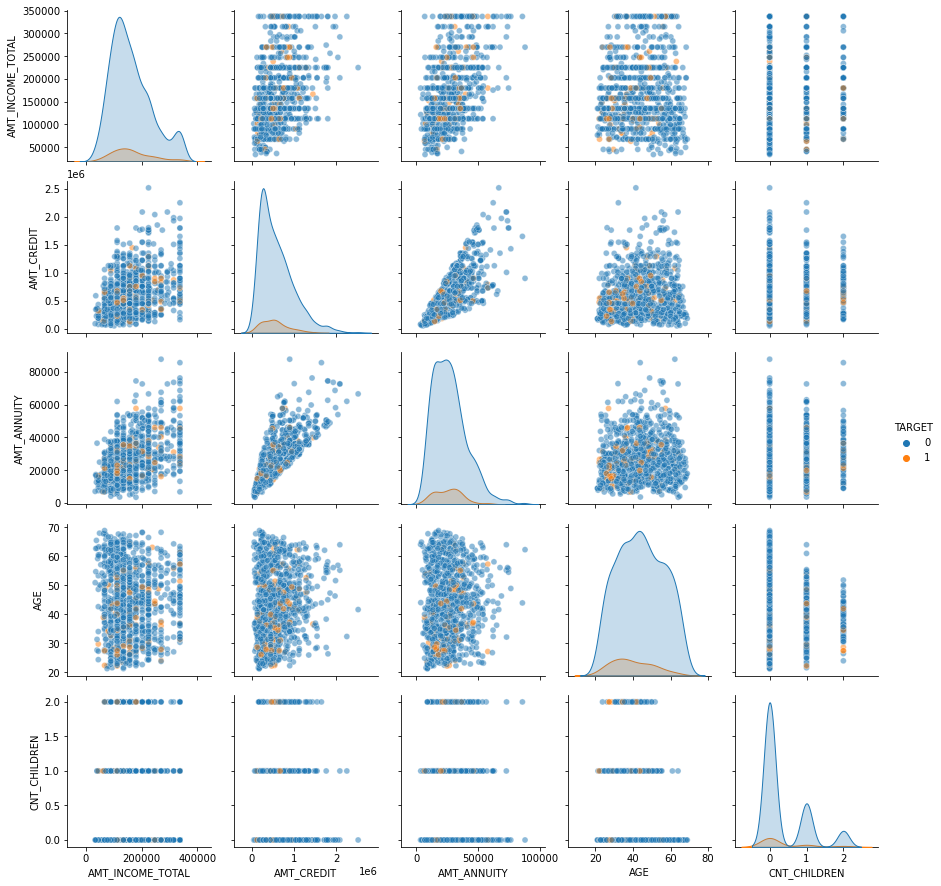

In [27]:
sns.pairplot(cleaned_data[['AMT_INCOME_TOTAL',
                           'AMT_CREDIT', 
                           'AMT_ANNUITY', 
                           'AGE', 
                           'CNT_CHILDREN', 
                           'TARGET']].sample(1000), 
             hue='TARGET', 
             plot_kws=dict(alpha=0.5))

### Hypothesis Statement and Testing <a name="hypo"></a>
<hr>

This data offers an incredible opportunity to determine the most reliable groups to lend money to. From the correlated graph above, we can state a few hypothesis and test them.

### 1. Comparing Age groups

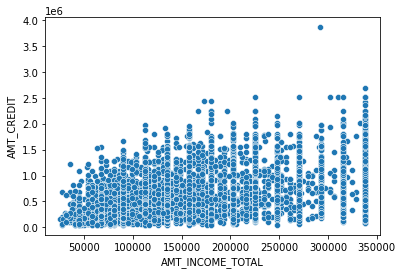

In [28]:
sns.scatterplot(data=cleaned_data[['AMT_INCOME_TOTAL', 
                                   'AMT_CREDIT']].sample(10000), 
                y = 'AMT_CREDIT', 
                x='AMT_INCOME_TOTAL')

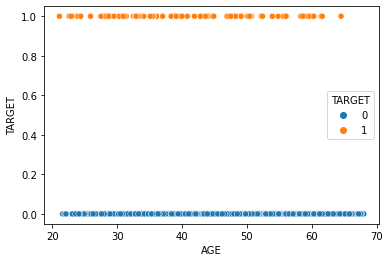

In [29]:
sns.scatterplot(data=cleaned_data[['TARGET', 
                                   'AGE']].sample(1000), 
                y = 'TARGET', 
                x = 'AGE', 
                hue='TARGET')

In [30]:
print('The mean age of Group 0 is ' + str(cleaned_data[cleaned_data['TARGET']==0]['AGE'].mean()))
print('The mean age of Group 1 is ' + str(cleaned_data[cleaned_data['TARGET']==1]['AGE'].mean()))

The mean age of Group 0 is 44.30515236172289
The mean age of Group 1 is 40.858234956550255


<a name="hypo1"></a>

From the above data, we can form a hypothesis.

**1st Hypothesis**:<br>

*Null Hypothesis:* The mean age of people in Group 0 and Group 1 is the same.<br>
*Alternate Hypothesis:* The mean age of people in Group 1 is significantly different than the mean age of people in Group 0.<br>

Therefore,<br>
$ h_{0}: \mu_{0} = \mu_{1} $ <br>
$ h_{1}: \mu_{0} \neq \mu_{1} $ <br>

where:<br>
$ \mu_{0} $: Mean age of Group 0 <br>
$ \mu_{1} $: Mean age of Group 1 <br><br>

Since the age distributions in both groups do not follow a normal distribution, a non-parametric test could be used to determine if the difference in mean is significant.<br>
However, I will take samples from each group and calculate their means to get a normal distribution for each group. This will allow us to perform the popular *t-test* instead of something like the *Whitney Mann U Test.*

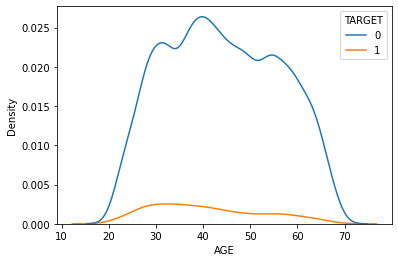

In [31]:
sns.kdeplot(data=cleaned_data[['TARGET', 
                               'AGE']].sample(10000), 
            x = 'AGE',
            hue='TARGET')

In [32]:
print('There are ' + str(len(cleaned_data[cleaned_data['TARGET']==0])) + ' records with Target = 0')
print('There are ' + str(len(cleaned_data[cleaned_data['TARGET']==1])) + ' records with Target = 1')

There are 278843 records with Target = 0
There are 24396 records with Target = 1


In [33]:
age_sample_0 = [0] * 10000
age_sample_1 = [0] * 10000

for i in range(len(age_sample_0)):
    age_sample_0[i] = cleaned_data[cleaned_data['TARGET'] == 0]['AGE'].sample(5000).mean()
    age_sample_1[i] = cleaned_data[cleaned_data['TARGET'] == 1]['AGE'].sample(1000).mean()
    
age_means = pd.DataFrame(data={'group_0': age_sample_0, 'group_1': age_sample_1})

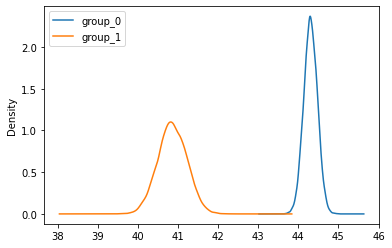

In [34]:
age_means.plot.kde()

We can see from the density plot that there is a clear difference between the mean of Group 0 and Group 1. However, to make sure that this difference is statistically significant and did not happen by chance, we have to perform a t-test. Our significance level is 5% and the p value is 2.5% since we are doing a two-tail test.<br><br>

Fortunately, scipy has a function to handle this test for us.

In [35]:
statistic, p_value = stats.ttest_ind(age_means['group_0'], age_means['group_1'])
significance_level = 0.05
if p_value < significance_level:
    print('The Null Hypothesis is rejected.')
else:
    print('The Null Hypothesis cannot be rejected')

The Null Hypothesis is rejected.


**Conclusion:**<br>
The Null hypothesis is rejected. Therefore, we accept that there is a difference between the means of Group 0 and Group 1, and in this case, $ \mu_{1} < \mu_{0} $<br>

### 2. Comparing Income Groups

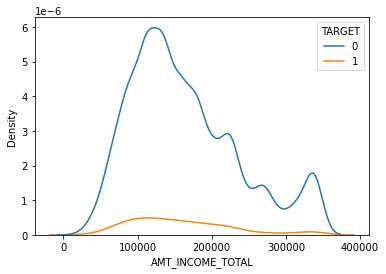

In [36]:
sns.kdeplot(data=cleaned_data[['TARGET', 
                               'AMT_INCOME_TOTAL']].sample(10000), 
            x = 'AMT_INCOME_TOTAL',
            hue='TARGET')

In [37]:
print('The mean income of Group 0 is ' + str(cleaned_data[cleaned_data['TARGET']==0]['AMT_INCOME_TOTAL'].mean()))
print('The mean income of Group 1 is ' + str(cleaned_data[cleaned_data['TARGET']==1]['AMT_INCOME_TOTAL'].mean()))

The mean income of Group 0 is 163078.8243509789
The mean income of Group 1 is 157155.14442941465


<a name="hypo2"></a>
From the above data, we can form a hypothesis.

**2nd Hypothesis**:<br>

*Null Hypothesis:* The mean income of people in Group 0 and Group 1 is the same.<br>
*Alternate Hypothesis:* The mean income of people in Group 1 is significantly different than the mean income of people in Group 0.<br>

Therefore,<br>
$ h_{0}: \mu_{0} = \mu_{1} $ <br>
$ h_{1}: \mu_{0} \neq \mu_{1} $ <br>

where:<br>
$ \mu_{0} $: Mean income of Group 0 <br>
$ \mu_{1} $: Mean income of Group 1 <br><br>

Like before, since the income distributions in both groups do not follow a normal distribution, a non-parametric test could be used to determine if the difference in mean is significant.<br>
However, I will take samples from each group and calculate their means to get a normal distribution for each group. This will allow us to perform the popular *t-test* instead of something like the *Whitney Mann U Test.*

In [38]:
income_sample_0 = [0] * 10000
income_sample_1 = [0] * 10000

for i in range(len(income_sample_0)):
    income_sample_0[i] = cleaned_data[cleaned_data['TARGET'] == 0]['AMT_INCOME_TOTAL'].sample(5000).mean()
    income_sample_1[i] = cleaned_data[cleaned_data['TARGET'] == 1]['AMT_INCOME_TOTAL'].sample(1000).mean()

income_means = pd.DataFrame(data={'group_0':income_sample_0, 'group_1':income_sample_1})

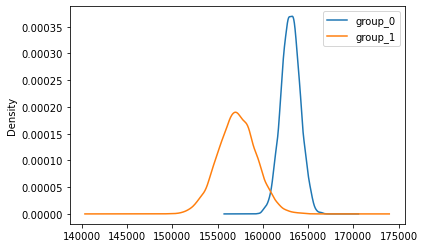

In [39]:
income_means.plot.kde()

Let's perform the same t-test as we did for the first hypothesis test.

In [40]:
statistic, p_value = stats.ttest_ind(income_means['group_0'], income_means['group_1'])
significance_level = 0.05
if p_value < significance_level:
    print('The Null Hypothesis is rejected.')
else:
    print('The Null Hypothesis cannot be rejected')

The Null Hypothesis is rejected.


**Conclusion:**<br>
The Null hypothesis is rejected. Therefore, we accept that there is a difference between the means of Group 0 and Group 1, and in this case, $ \mu_{1} < \mu_{0} $<br>

### 3. Comparing Children Count

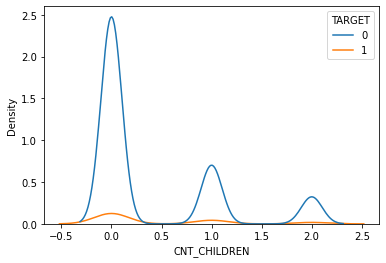

In [41]:
sns.kdeplot(data=cleaned_data[['TARGET',
                               'CNT_CHILDREN']].sample(10000), 
            x = 'CNT_CHILDREN', 
            hue='TARGET')

In [42]:
print('The mean children count of Group 0 is ' + str(cleaned_data[cleaned_data['TARGET']==0]['CNT_CHILDREN'].mean()))
print('The mean children count of Group 1 is ' + str(cleaned_data[cleaned_data['TARGET']==1]['CNT_CHILDREN'].mean()))

The mean children count of Group 0 is 0.3747521006444487
The mean children count of Group 1 is 0.41482210198393177


<a name="hypo3"></a>
From the above data, we can form a hypothesis.

**3rd Hypothesis**:<br>

*Null Hypothesis:* The mean children of people in Group 0 and Group 1 is the same.<br>
*Alternate Hypothesis:* The mean children count of people in Group 1 is significantly different than the mean children count of people in Group 0.<br>

Therefore,<br>
$ h_{0}: \mu_{0} = \mu_{1} $ <br>
$ h_{1}: \mu_{0} \neq \mu_{1} $ <br>

where:<br>
$ \mu_{0} $: Mean children count of Group 0 <br>
$ \mu_{1} $: Mean children count of Group 1 <br><br>

Like before, since the children count distributions in both groups do not follow a normal distribution, a non-parametric test could be used to determine if the difference in mean is significant.<br>
However, I will take samples from each group and calculate their means to get a normal distribution for each group. This will allow us to perform the popular *t-test* instead of something like the *Whitney Mann U Test.*

In [43]:
children_sample_0 = [0] * 10000
children_sample_1 = [0] * 10000

for i in range(len(children_sample_0)):
    children_sample_0[i] = cleaned_data[cleaned_data['TARGET'] == 0]['CNT_CHILDREN'].sample(5000).mean()
    children_sample_1[i] = cleaned_data[cleaned_data['TARGET'] == 1]['CNT_CHILDREN'].sample(1000).mean()

children_means = pd.DataFrame(data={'group_0':children_sample_0, 'group_1':children_sample_1})

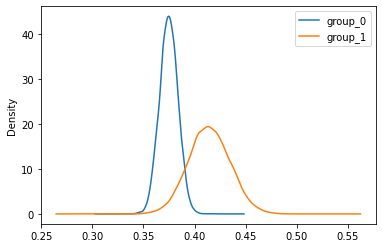

In [44]:
children_means.plot.kde()

Let's perform the same t-test as we did for the first and second hypothesis test.

In [45]:
statistic, p_value = stats.ttest_ind(income_means['group_0'], income_means['group_1'], equal_var=False)
significance_level = 0.05
if p_value < significance_level:
    print('The Null Hypothesis is rejected.')
else:
    print('The Null Hypothesis cannot be rejected')

The Null Hypothesis is rejected.


**Conclusion:**<br>
The Null hypothesis is rejected. Therefore, we accept that there is a difference between the means of Group 0 and Group 1, and in this case, $ \mu_{1} > \mu_{0} $<br>

### Conclusion <a name="conclusion"></a>
<hr>

The dataset now looks in good shape. The next steps would be to find any correlation among the features and select a model that can be trained to predict the 'TARGET' feature.<br>

*Request:*<br>
I would love if the author of the dataset could enlighten us further on how the data was selected.